# Linear Regression

Linear regression is used for regression tasks where the output is a continuous variable. 
- If the input data has only one feature, it is referred to as Simple Linear Regression.
- When the input data has more than one feature, it is called Multiple Linear Regression.
- This method does not have parameters that can be used for regularization.

## Simple Linear Regression

The input has only one variable.
- The model is represented as: $f(x)=ax+b$ where x is the input (feature).
- The algorithm determines the coefficient (slope) $a$ and the y-intercept (bias) $𝑏$.
- Linear regression finds the line that best fits (closest to) the data points.
- The algorithm minimizes the sum of the squared differences (residuals) between the actual and predicted values.

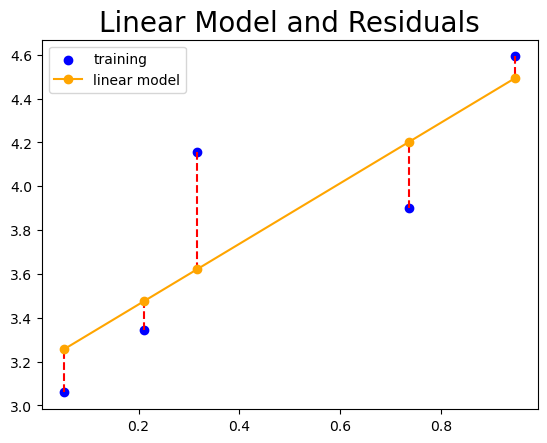

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

x = np.linspace(0,1,20)
noise = np.random.randn(20)/3
y = 2*x+3+noise

x_train = np.array([x[i] for i in [1,4,6,14,18]])
y_train = np.array([y[i] for i in [1,4,6,14,18]])

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train.reshape(-1,1),y_train)
y_l = lin_reg.predict(x_train.reshape(-1,1))

for i in range(x_train.shape[0]):
  plt.plot([x_train[i],x_train[i]], [y_train[i], y_l[i]], 'r--')

plt.scatter(x_train,y_train, label='training', c='b')
plt.plot(x_train,y_l,label= 'linear model', c='orange', marker='o')
plt.title('Linear Model and Residuals', fontsize=20)
plt.legend();

In the figure above, the orange points represent the predicted values, while the blue points represent the actual values.
- The red dashed lines represent the residuals.

### Data With One Feature
We will begin by working with the first 1,000 samples from the California Housing Dataset, followed by using the entire dataset.

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

#### Partial Data

In [3]:
N = 1000
X = housing.data[:N,0]
y = housing.target[:N]
X.shape, y.shape

((1000,), (1000,))

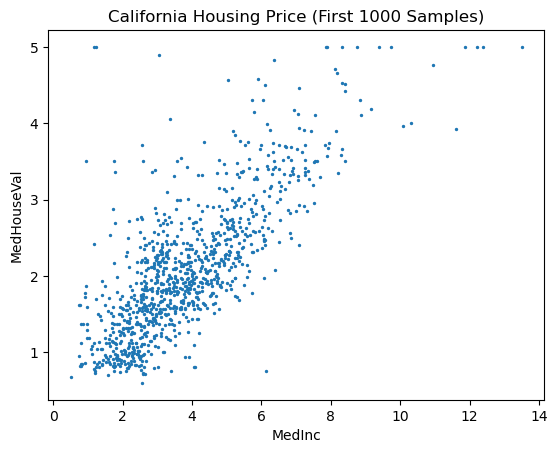

In [4]:
# scatter plot of MedInc vs MedHouseVal
import matplotlib.pyplot as plt
plt.scatter(X, y, s=2)
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('California Housing Price (First 1000 Samples)');

In [5]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

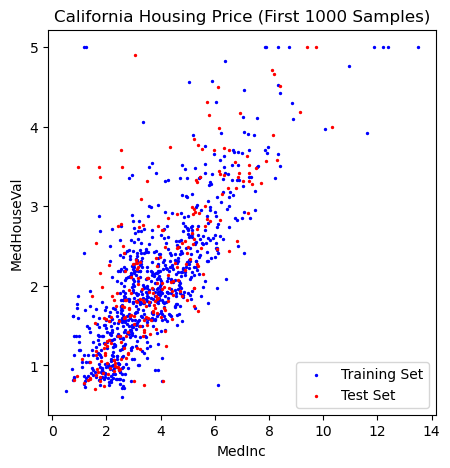

In [6]:
# plot training and test set
plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train, label='Training Set', c='blue', s=2)
plt.scatter(X_test,y_test, label='Test Set', c='r', s=2)

plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('California Housing Price (First 1000 Samples)')
plt.legend();

In [7]:
# fit model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [8]:
# intercept
b = lin_reg.intercept_
b

0.6634359564195174

In [9]:
# coefficient
a = lin_reg.coef_
a

array([0.36823262])

In [10]:
# line x and y
import numpy as np
X_lin = np.linspace(0,15,100)
y_lin = a*X_lin+b

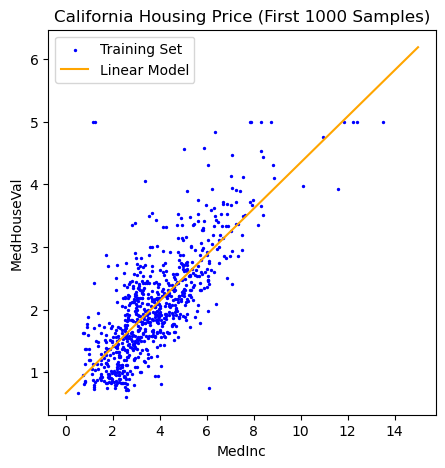

In [11]:
# plot training and test sets
plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train, label='Training Set', c='blue', s=2)
plt.plot(X_lin, y_lin, label='Linear Model', c='orange')

plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('California Housing Price (First 1000 Samples)')
plt.legend();

In [12]:
# training score
lin_reg.score(X_train.reshape(-1,1), y_train)

0.5903136483906415

In [13]:
# test score
lin_reg.score(X_test.reshape(-1,1), y_test)

0.574269787419049

#### Whole Data

In [14]:
X = housing.data[:,0]
y = housing.target
X.shape, y.shape

((20640,), (20640,))

In [15]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

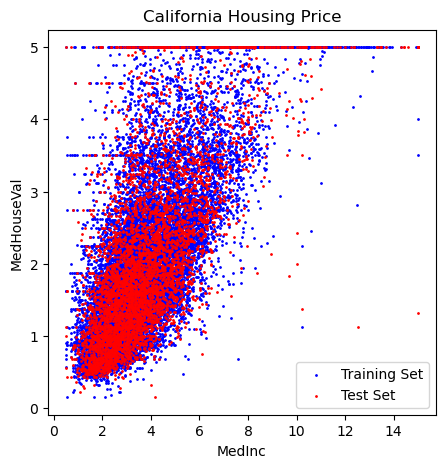

In [16]:
# plot training and test set
plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train, label='Training Set', c='blue', s=1)
plt.scatter(X_test,y_test, label='Test Set', c='r', s=1)

plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('California Housing Price')
plt.legend();

In [17]:
# fit model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [18]:
# intercept
b = lin_reg.intercept_
b

0.43642774209170887

In [19]:
# ceoefficient
a = lin_reg.coef_
a

array([0.42273457])

In [20]:
# line x and y
import numpy as np
X_lin = np.linspace(0,10,100)
y_lin = a*X_lin+b

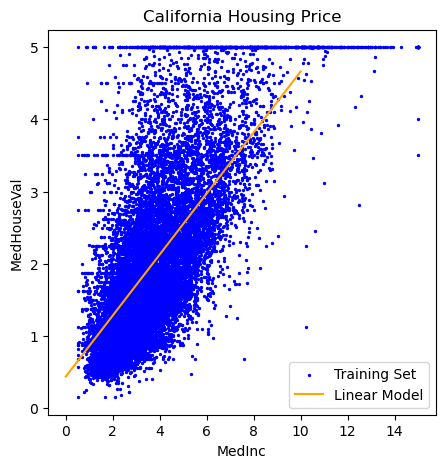

In [21]:
# plot training and test sets
plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train, label='Training Set', c='blue', s=2)
plt.plot(X_lin, y_lin, label='Linear Model', c='orange')

plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('California Housing Price')
plt.legend();

In [22]:
# training score
lin_reg.score(X_train.reshape(-1,1), y_train)

0.48061930819884535

In [23]:
# test score
lin_reg.score(X_test.reshape(-1,1), y_test)

0.4512591462254416

#### Restricted Data
In this section, we will work with the samples where the output value (MedHouseVal) is less than 4.

In [24]:
#Restrict the data to y<4, y_r
y_r = y[y < 4]
y_r.shape

(18869,)

In [25]:
# X_r
X_r = X[y < 4]
X_r.shape

(18869,)

In [26]:
# train test split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_r, y_r, test_size=0.33, random_state=42)

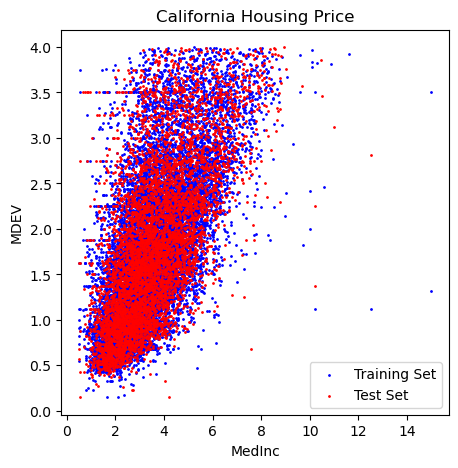

In [27]:
# plot training and test set
plt.figure(figsize=(5,5))
plt.scatter(Xr_train,yr_train, label='Training Set', c='blue', s=1)
plt.scatter(Xr_test,yr_test, label='Test Set', c='r', s=1)

plt.xlabel('MedInc')
plt.ylabel('MDEV')
plt.title('California Housing Price')
plt.legend();

In [28]:
# fit the model
lin_reg = LinearRegression()
lin_reg.fit(Xr_train.reshape(-1,1),yr_train)

LinearRegression()

In [29]:
# coefficient
a = lin_reg.coef_
a

array([0.36193269])

In [30]:
# intercept
b = lin_reg.intercept_
b

0.5186136742943914

In [31]:
# line x and y
Xr_lin = np.linspace(0,10,100)
yr_lin = a*Xr_lin+b

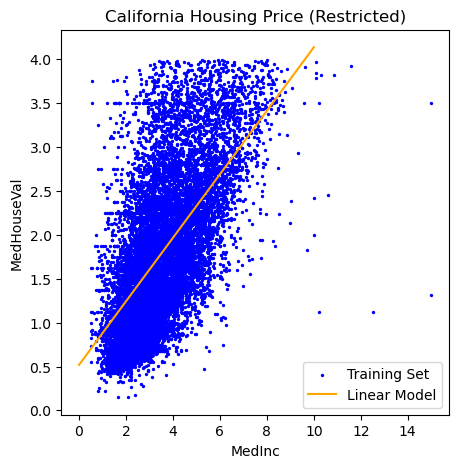

In [32]:
# plot training and test sets
plt.figure(figsize=(5,5))
plt.scatter(Xr_train,yr_train, label='Training Set', c='blue', s=2)
plt.plot(Xr_lin, yr_lin, label='Linear Model', c='orange')

plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('California Housing Price (Restricted)')
plt.legend();

In [33]:
# training score
lin_reg.score(Xr_train.reshape(-1,1), yr_train)

0.40022465127685924

In [34]:
# test score
lin_reg.score(Xr_test.reshape(-1,1), yr_test)

0.40664648139678006

## Multiple Linear Regression

The input has more than one variable (feature).
- If there are two features $x_1$ and $x_2$, the model is represented as: $f(x)=a_1x_1+a_2x_2+b$.
- The algorithm determines the coefficients (slopes) $a_1, a_2$ and the y-intercept (bias) $𝑏$.
- Linear regression finds the hyperplane that best fits (closest to) the data points.
- The algorithm minimizes the sum of the squared differences (residuals) between the actual and predicted values.

### Data With All Features

In [35]:
X = housing.data
y = housing.target

- All 8 features will be included in the input data.

In [36]:
X.shape, y.shape

((20640, 8), (20640,))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
# fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [39]:
# intercept
b = lin_reg.intercept_
b

-36.609593778714135

In [40]:
# coefficients
a = lin_reg.coef_
a

array([ 4.39091042e-01,  9.59864665e-03, -1.03311173e-01,  6.16730152e-01,
       -7.63275197e-06, -4.48838256e-03, -4.17353284e-01, -4.30614462e-01])

In [41]:
# coefficient shape
a.shape

(8,)

In [42]:
# training score
lin_reg.score(X_train  , y_train )

0.6109633715458153

In [43]:
# test score
lin_reg.score(X_test  , y_test )

0.5911695436410482

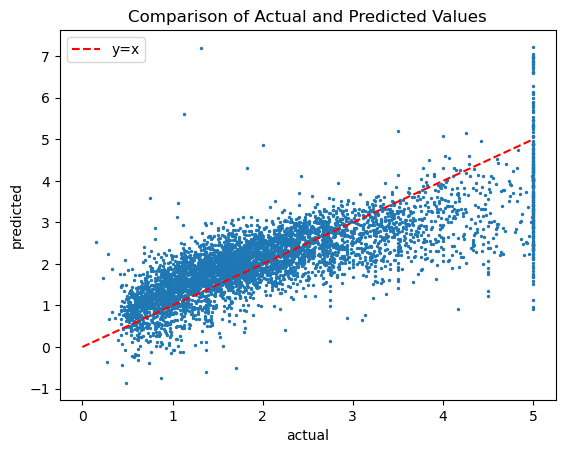

In [44]:
# actual vs predicted scatter plot
plt.scatter(y_test ,lin_reg.predict(X_test  ), s=2)
plt.plot([0,5],[0,5], 'r--', label='y=x')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.legend();

#### Coefficients

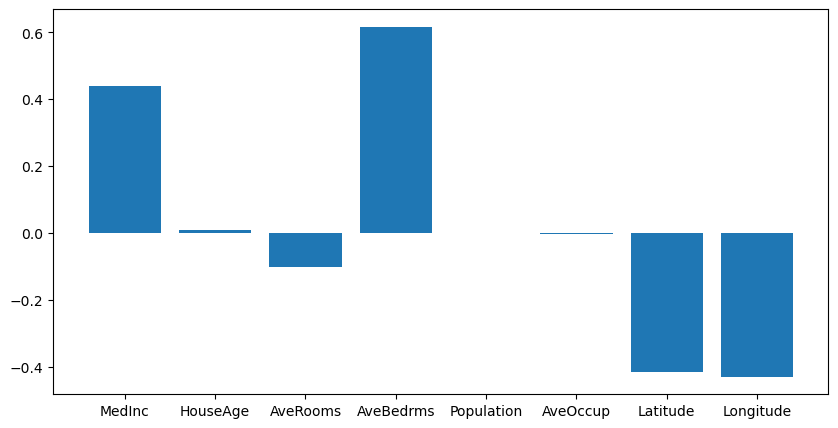

In [45]:
# coefficients in a bar graph
plt.figure(figsize=(10,5))
plt.bar(housing.feature_names, lin_reg.coef_);

In [46]:
sorted = np.argsort(lin_reg.coef_)
sorted

array([7, 6, 2, 5, 4, 1, 0, 3])

In [47]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [48]:
np.array(housing.feature_names)[sorted]

array(['Longitude', 'Latitude', 'AveRooms', 'AveOccup', 'Population',
       'HouseAge', 'MedInc', 'AveBedrms'], dtype='<U10')

In [49]:
lin_reg.coef_[sorted]

array([-4.30614462e-01, -4.17353284e-01, -1.03311173e-01, -4.48838256e-03,
       -7.63275197e-06,  9.59864665e-03,  4.39091042e-01,  6.16730152e-01])

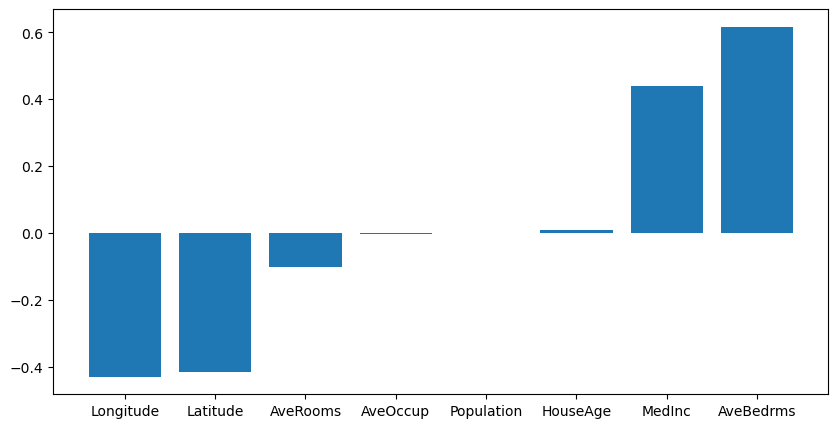

In [50]:
# sorted coefficients in a bar graph

plt.figure(figsize=(10,5))
plt.bar(np.array(housing.feature_names)[sorted], lin_reg.coef_[sorted]);